# Exploratory Data Analysis (EDA) and Business Insights

## **1. Data Loading and Setup**
We start by importing necessary libraries for data analysis and visualization.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **2. Data Loading**  
We load the required datasets into Pandas DataFrames.

In [ ]:
df_customers = pd.read_csv('Customers.csv')
df_products = pd.read_csv('Products.csv')
df_transactions = pd.read_csv('Transactions.csv')

## **3. Previewing Customers Dataset**  
To understand the structure of the `Customers`, `Products`, `Transactions` dataset, we display the first five rows.


In [ ]:
df_customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
df_products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
df_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [ ]:
df_transactions['TransactionDate'] = pd.to_datetime(df_transactions['TransactionDate'])

In [ ]:
df_transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## **4. Checking for Missing Values**  
Before proceeding with analysis, we check for missing values in all datasets.

In [ ]:
print("Missing values in Customers dataset:\n", df_customers.isnull().sum())
print("Missing values in Products dataset:\n", df_products.isnull().sum())
print("Missing values in Transactions dataset:\n", df_transactions.isnull().sum())

Missing values in Customers dataset:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions dataset:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## **5. Descriptive Statistics of all three Dataset**  
To get an overview of the dataset, we use `.describe(include='all')` to summarize numerical and categorical features.


In [ ]:
print(df_customers.describe(include='all'))

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3


In [ ]:
print(df_products.describe(include='all'))

       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


In [ ]:
print(df_transactions.describe())

                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639


## **6. Checking for Duplicate Rows**  
We check for any duplicate rows in each dataset to ensure data integrity.

In [ ]:
print("Duplicate rows in Customers:", df_customers.duplicated().sum())
print("Duplicate rows in Products:", df_products.duplicated().sum())
print("Duplicate rows in Transactions:", df_transactions.duplicated().sum())

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


There exists no duplicate values in datasets

## **7. Customer Spending Analysis**  
We calculate the total spending of each customer by grouping the `Transactions` dataset by `CustomerID` and summing the `TotalValue`.

In [ ]:
customer_spending = df_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpending']
print(customer_spending.sort_values(by='TotalSpending', ascending=False).head())

    CustomerID  TotalSpending
140      C0141       10673.87
53       C0054        8040.39
64       C0065        7663.70
155      C0156        7634.45
81       C0082        7572.91


  
## **8. Product Sales Analysis**  
We calculate the total sales for each product by grouping the `Transactions` dataset by `ProductID` and summing the `TotalValue`.

In [ ]:
product_sales = df_transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales.columns = ['ProductID', 'TotalSales']
print(product_sales.sort_values(by='TotalSales', ascending=False).head())

   ProductID  TotalSales
28      P029    19513.80
78      P079    17946.91
47      P048    17905.20
19      P020    15060.92
61      P062    14592.24


## **9. Customer Distribution by Region**  
We use a count plot to visualize the distribution of customers across different regions.

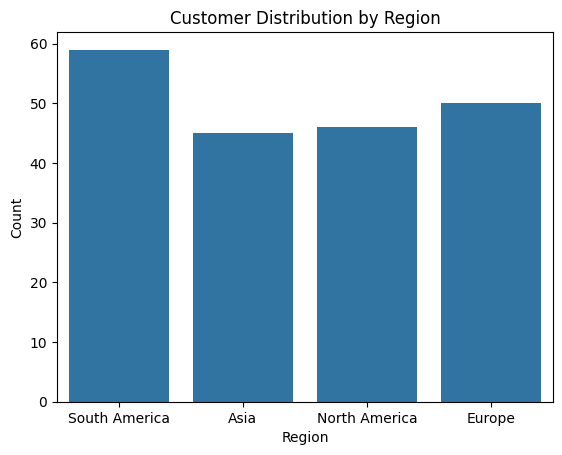

In [ ]:
sns.countplot(x='Region', data=df_customers)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

### Insights:
- The count plot reveals that `South America` has the highest number of customers, followed by `Europe`.

## **10. Customer Signups by Year**  
We convert the `SignupDate` to a datetime format and extract the year to visualize the trends in customer signups.

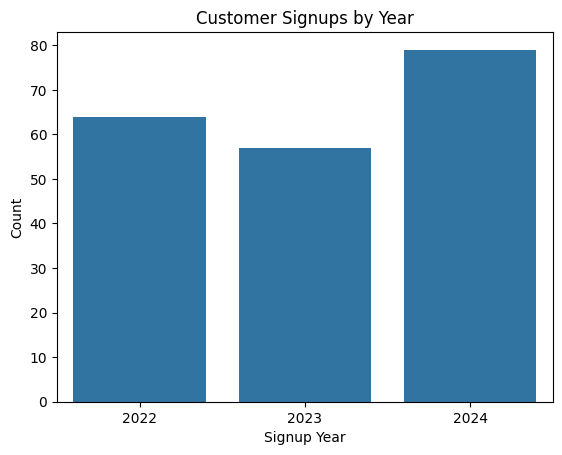

In [ ]:
df_customers['SignupDate'] = pd.to_datetime(df_customers['SignupDate'])
df_customers['SignupYear'] = df_customers['SignupDate'].dt.year
sns.countplot(x='SignupYear', data=df_customers)
plt.title('Customer Signups by Year')
plt.xlabel('Signup Year')
plt.ylabel('Count')
plt.show()

### Insights:
- The count plot reveals that the year `2024` has the highest number of customers  signups.

## **11. Product Distribution by Category**  
We use a count plot to visualize the distribution of products across different categories.

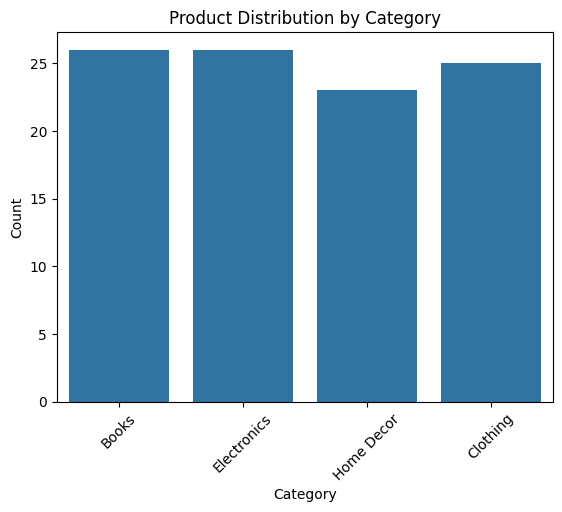

In [ ]:
sns.countplot(x='Category', data=df_products)
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Insights:
- `Electronics` and `Books` are the most popular categories, with an equal and the highest count of products.
- `Clothing` and `Home Decor` follow as the next most represented categories.

## **12. Product Price Distribution**  
We use a histogram with a kernel density estimate (KDE) to visualize the distribution of product prices.

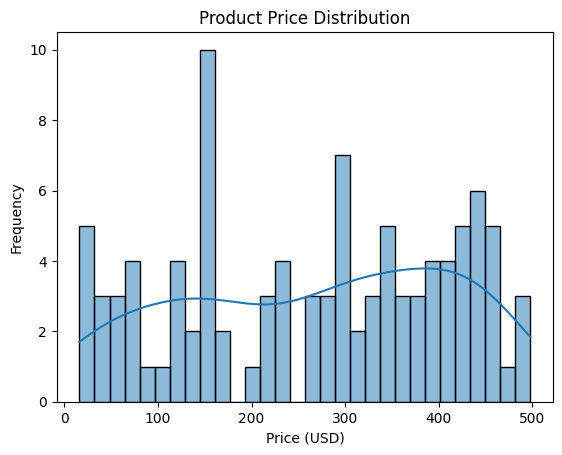

In [ ]:
sns.histplot(df_products['Price'], kde=True, bins=30)
plt.title('Product Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

### Insights:
- The plot reveals that the majority of products are priced between 100 and 200 USD, as this range has the highest frequency.

## **13. Total Spending per Customer**  
We calculate the total spending for each customer and use a histogram with a kernel density estimate (KDE) to visualize the distribution of customer spending.

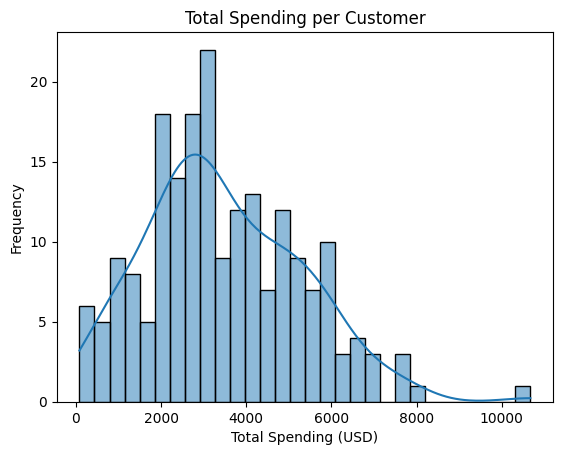

In [ ]:
customer_spending = df_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending.columns = ['CustomerID', 'TotalSpending']
sns.histplot(customer_spending['TotalSpending'], kde=True, bins=30)
plt.title('Total Spending per Customer')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Frequency')
plt.show()

### Insights:
- The plot reveals that the spending distribution has two prominent peaks: one around 2000 USD and another around 4000 USD.

## **14. Monthly Revenue Trend**  
We calculate the total revenue per month by grouping the `Transactions` dataset by month and summing the `TotalValue`. A line plot is then used to visualize the monthly revenue trend.

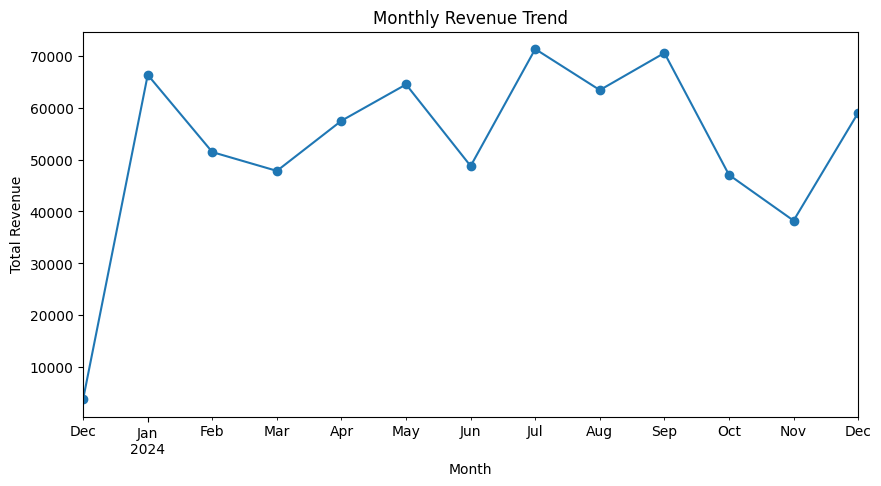

In [ ]:
monthly_revenue = df_transactions.groupby(df_transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend', marker='o', figsize=(10, 5))
plt.ylabel('Total Revenue')
plt.xlabel('Month')
plt.show()

### Insights:
- The **revenue trend** shows that **July** and **September** have the highest performance in terms of total revenue.
- These months are followed by **January**, **May**, and **August**, indicating relatively good performance, but with a noticeable drop compared to July and September.

## **15. Top 10 Most Sold Products**  
We calculate the sales count for each product by grouping the `Transactions` dataset by `ProductID` and sorting the products by the highest sales count. We then extract the names of the top 10 products and visualize them in a bar plot.

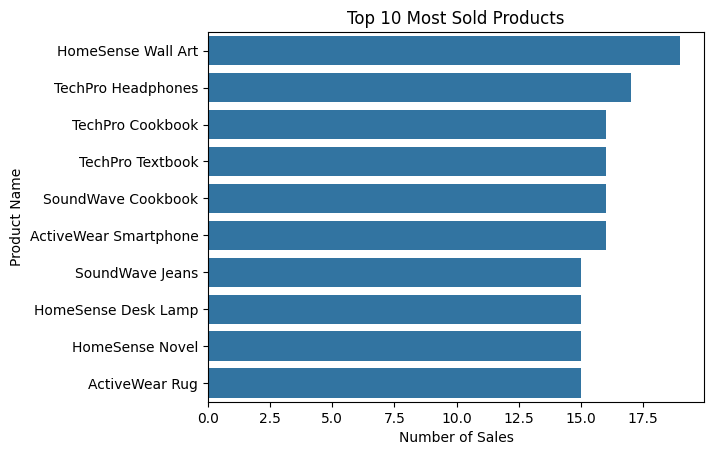

In [ ]:
product_sales = df_transactions.groupby('ProductID').size().sort_values(ascending=False)

top_products = product_sales.head(10)
top_product_names = df_products[df_products['ProductID'].isin(top_products.index)]
top_product_names['SalesCount'] = top_products.values

sns.barplot(x='SalesCount', y='ProductName', data=top_product_names)
plt.title('Top 10 Most Sold Products')
plt.xlabel('Number of Sales')
plt.ylabel('Product Name')
plt.show()

### Insights:
**HomeSence Wall** Art and **TechPro Headphones** are the products with the highest number of sales, contributing the majority to the top 10 sales count.

## **16. Top 10 Revenue Generating Products**  
We calculate the total revenue for each product by grouping the `Transactions` dataset by `ProductID` and summing the `TotalValue`. We then sort the products by revenue and visualize the top 10 revenue-generating products in a bar plot.

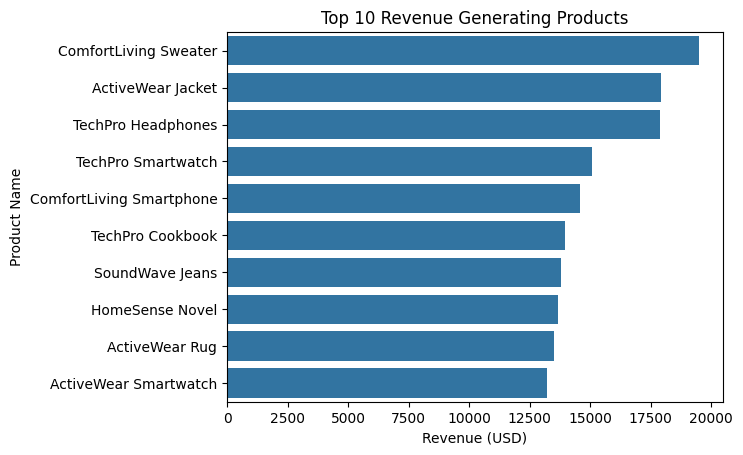

In [ ]:
product_revenue = df_transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)
top_revenue_products = df_products[df_products['ProductID'].isin(product_revenue.head(10).index)]
top_revenue_products['Revenue'] = product_revenue.head(10).values

sns.barplot(x='Revenue', y='ProductName', data=top_revenue_products)
plt.title('Top 10 Revenue Generating Products')
plt.xlabel('Revenue (USD)')
plt.ylabel('Product Name')
plt.show()

### Insights:
**ComfortLiving Sweater** is one of the top revenue-generating products, performing exceptionally well in terms of revenue.

## **17. Top 10 Customers by Spending**  
We identify the top 10 customers with the highest total spending by sorting the `customer_spending` dataset in descending order. We then merge the `customer_spending` DataFrame with the `df_customers` DataFrame to get the customer names and visualize the top customers with a bar plot.

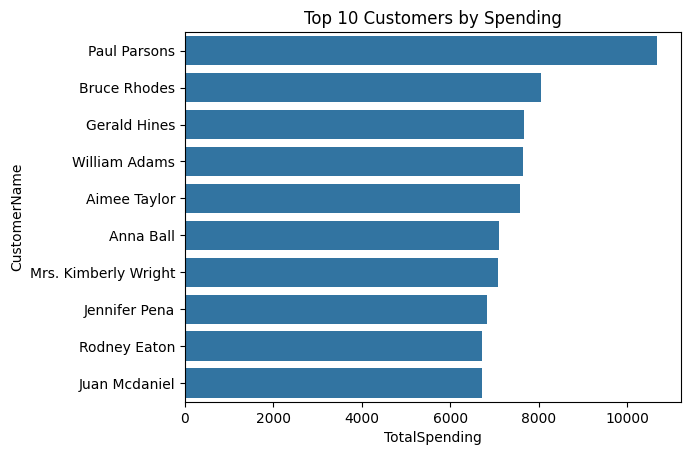

In [63]:
top_customers = customer_spending.nlargest(10, 'TotalSpending')
top_customers_names = top_customers.merge(df_customers[['CustomerID', 'CustomerName']], on='CustomerID', how='left')

sns.barplot(x='TotalSpending', y='CustomerName', data=top_customers_names)
plt.title('Top 10 Customers by Spending')
plt.show()


### Insights:
- **Paul Parsons** is the highest spender, leading the list of top 10 customers.

## **18. Product Purchases by Region**  
We merge the `Transactions` dataset with the `Customers` dataset on `CustomerID` and then group the data by `Region` and `ProductID` to count the number of purchases for each product in each region. The result is displayed as a heatmap.

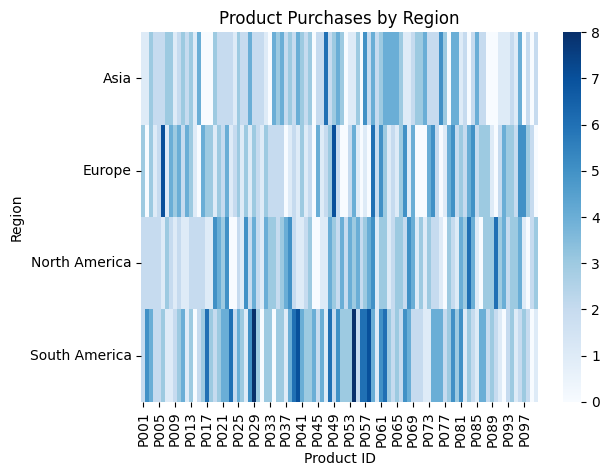

In [ ]:
merged_data = df_transactions.merge(df_customers, on='CustomerID')
region_product_sales = merged_data.groupby(['Region', 'ProductID']).size().unstack().fillna(0)

sns.heatmap(region_product_sales, cmap='Blues', annot=False)
plt.title('Product Purchases by Region')
plt.xlabel('Product ID')
plt.ylabel('Region')
plt.show()

### Insights:
- **Asia** shows a high volume of purchases across a wide range of products, indicating a broad customer base and diverse product preferences.

## **19. Distribution of Transactions per Customer**  
We analyze the distribution of transactions for each customer by counting how many times each customer appears in the `Transactions` dataset. We then visualize this distribution using a histogram with a KDE curve.

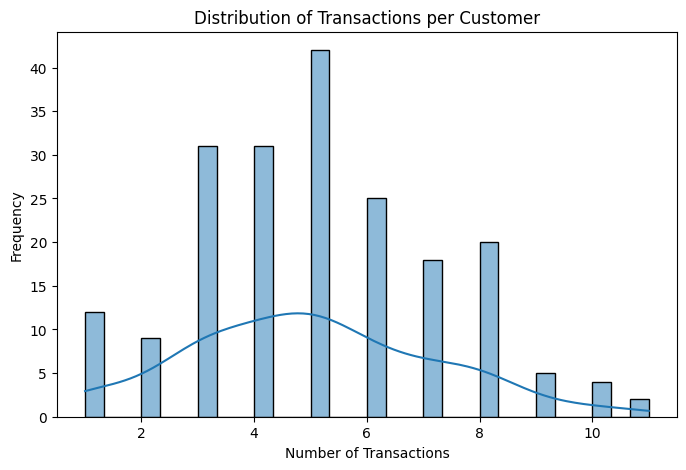

Percentage of one-time customers: 6.03%


In [62]:
transactions_per_customer = df_transactions['CustomerID'].value_counts()
plt.figure(figsize=(8, 5))
sns.histplot(transactions_per_customer, bins=30, kde=True)
plt.title('Distribution of Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()

one_time_customers = transactions_per_customer[transactions_per_customer == 1].count()
total_customers = transactions_per_customer.count()
print(f"Percentage of one-time customers: {one_time_customers / total_customers * 100:.2f}%")


### **Key Observations:**

- **Majority of Customers are Repeat Buyers:**  
  The histogram shows a significant portion of customers make multiple transactions, with the peak at 5-6 transactions, indicating frequent purchases.

- **Long Tail:**  
  The long tail suggests a smaller group of high-value customers who make many transactions, contributing significantly to revenue.

- **One-Time Customers:**  
  A segment of customers (indicated by the bar for "1" transaction) made only a single purchase, although the exact percentage cannot be determined without the total customer count.
